# Titanic

## Introduction
This notebook is a study of the Kaggle project <a href = "https://www.kaggle.com/c/titanic">Titanic: Machine Learning from disaster</a>. The goal is to understand and to develop a general workflow of machine learning problem. This version is to test wether we need Age*Class.

## Workflow stages
The competition solution workflow goes through seven stages described
<ol>
  <li> Question or problem definition.</li>
  <li> Aquire training and testing data.</li>
  <li> Wrangle, prepare and clean the data.</li>
  <li> Analyze, identify patterns and explore the data.</li>
  <li> Model, predict and solve the problem.</li>
  <li> Visualize, report and present the problem solving steps and final solution.</li>
  <li> Supply and submit the result. </li>
</ol>

1, 2, 3, are actually the most important for general data analysis, but is much simplified in a Kaggle competition. For Kaggle, the emphasis becomes 4, 5, 6. In general, people talk about EDA, feature engineering, feature selection and model training, and finally ensemble all the learning models to a meta learner using stacking/boosting.

The workflow indicates general sequence of how each stage may follow the other. However there are use cases with exceptions.
<ul>
<li>We may combine mulitple workflow stages. We may analyze by visualizing data.</li>
<li>Perform a stage earlier than indicated. We may analyze data before and after wrangling.</li>
<li>Perform a stage multiple times in our workflow. Visualize stage may be used multiple times.</li>
<li>Drop a stage altogether. We may not need supply stage to productize or service enable our dataset for a competition.</li>
</ul>

## Workflow goals
The data science solutions workflow solves for seven major goals.
<ol>
<li>
**Classifying**. We may want to classify or categorize our samples. We may also want to understand the implications or correlation of different classes with our solution goal.
</li>
<li> 
**Correlating**. One can approach the problem based on available features within the training dataset. Which features within the dataset contribute significantly to our solution goal? Statistically speaking is there a correlation among a feature and solution goal? As the feature values change does the solution state change as well, and visa-versa? This can be tested both for numerical and categorical features in the given dataset. We may also want to determine correlation among features other than survival for subsequent goals and workflow stages. Correlating certain features may help in creating, completing, or correcting features.
</li>
<li>
**Converting**. For modeling stage, one needs to prepare the data. Depending on the choice of model algorithm one may require all features to be converted to numerical equivalent values. So for instance converting text categorical values to numeric values.
</li>
<li>
**Completing**. Data preparation may also require us to estimate any missing values within a feature. Model algorithms may work best when there are no missing values.
</li>
<li>
**Correcting**. We may also analyze the given training dataset for errors or possibly innacurate values within features and try to corrent these values or exclude the samples containing the errors. One way to do this is to detect any outliers among our samples or features. We may also completely discard a feature if it is not contribting to the analysis or may significantly skew the results.
</li>
<li>
**Creating**. Can we create new features based on an existing feature or a set of features, such that the new feature follows the correlation, conversion, completeness goals.
</li>
<li>
**Charting**. How to select the right visualization plots and charts depending on nature of the data and the solution goals. A good start is to read the Tableau paper on <a href = "https://www.tableau.com/sites/default/files/media/which_chart_v6_final_0.pdf">Which chart or graph is right for you?</a>.
</li>
</ol>

### Import libraries

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random
import re
from sklearn import preprocessing

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')
combine = [train_df, test_df]

# store passengerID for submission
PassengerId = test_df['PassengerId']

# preview the data 
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Exploratory Data Analysis (EDA)

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.<br>

**Which features are available in the dataset?**

Noting the feature names for directly manipulating or analyzing these. These feature names are described on <a href = "https://www.kaggle.com/c/titanic/data">the Kaggle data page here</a>.

In [3]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

**Which features are categorical?**

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex and Embarked. Ordinal: PassengerID, Pclass.

**Which features are numerical?**

These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

Continous: Age, Fare. Discrete: SibSp, Parch.

**Which features are mixed data types?**

Numerical, alphanumeric data within same feature. These are candidates for correcting goal.

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

**Which features are text?**

These values contain descriptions. We need to extract informaiton by dividing text into tokens and do statistics on the strings. 

Name is a text feature here. 

In [4]:
train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

**Which features may contain errors or typos?**

This is harder to review for a large dataset, however reviewing a few samples from a smaller dataset may just tell us outright, which features may require correcting. Usually for text features, we need to extract tokens and do frequency analysis. 

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

**Which features contain blank, null or empty values?**

These will require correcting.
<ul>
<li> Cabin > Age > Embarked features contain a number of null values in that order for the training dataset.</li>
<li> Cabin > Age are incomplete in case of test dataset.</li>
</ul>

I think Carbin misses too much data, may just drop it. Another option is to have a new feature, whether having Cabin information or not.

**What are the data types for various features?**

Helping us during converting goal.
<ul>
<li> Seven features are integer or floats. Six in case of test dataset.</li>
<li> Five features are strings (object).</li>
</ul>

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.
<ul>
<li> Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).</li>
<li> Survived is a categorical feature with 0 or 1 values. </li>
<li> Around 38.38% samples survived representative of the actual survival rate at 32%.</li>
<li> Most passengers (> 75%) did not travel with parents or children.</li>
<li> Nearly 30% of the passengers had siblings and/or spouse aboard.</li>
<li> Fares varied significantly with few passengers (< 1%) paying as high as $512. </li>
<li> Few elderly passengers (< 1%) within age range 65-80. </li>
</ul>

In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


** What is the distribution of categorical features?**
<ul>
<li> Names are unique across the dataset (count=unique=891).</li>
<li> Sex variable as two possible values with 65% male (top=male, freq=577/count=891).</li>
<li> Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.</li>
<li> Embarked takes three possible values. S port used by most passengers (top=S).</li>
<li> Ticket feature has high ratio (22%) of duplicate values (unique=681).</li>
</ul>

### Assumtions based on data analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.
<ol>
<li>
**Correlating.**
We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.
</li>

<li>
**Completing.**
<ul>
<li>We may want to complete Age feature as it is definitely correlated to survival.</li>
<li>We may want to complete the Embarked feature as it may also correlate with survival or another important feature.</li>
</ul>
</li>

<li>
**Correcting.**
In other words, feature selection. In more complicated situation, we need to use algorithm to help us to select features. In this simple example, we use domain knowledge to drop features by hand. 
<ul>
<li> Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.</li>
<li> Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.</li>
<li> PassengerId may be dropped from training dataset as it does not contribute to survival.</li>
<li> Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.</li>
</ul>
</li>

<li>
**Creating.**
This is the most important step (feature engineering).
<ul>
<li>We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.</li>
<li>Engineer a feature from the above, we include a feature isAlone or not.</li>
<li>We may want to engineer the Name feature to extract Title as a new feature.</li>
<li>We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.</li>
<li>We may also want to create a Fare range feature if it helps our analysis.</li>
<li>We may include a feature whether the person has a carbin or not. 
<li> Ticket may also extract has letters and the length of number. </li>
</ul>
</li>

<li>
**Classifying.**
We may also add to our assumptions based on the problem description noted earlier.
<ul>
<li>Women (Sex=female) were more likely to have survived.</li>
<li>Children (Age<?) were more likely to have survived.</li>
<li>The upper-class passengers (Pclass=1) were more likely to have survived.</li>
</ul>
</li>
</ol>

### Correlating numerical and ordinal features

We can combine multiple features for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values.

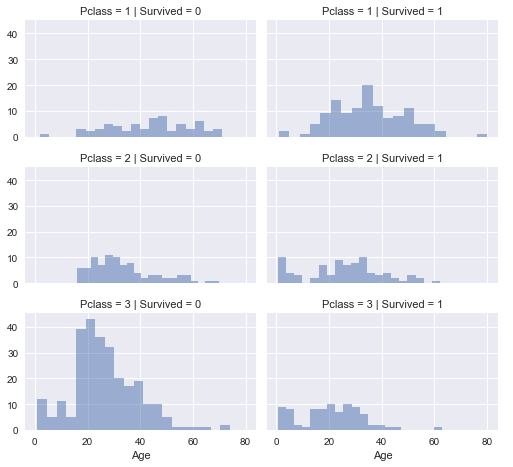

In [7]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Observations.**
<ul>
<li> Pclass=3 had most passengers, however most did not survive. Confirms our classifying assumption #2.</li>
<li> Infant passengers in Pclass=2 and Pclass=3 mostly survived. Further qualifies our classifying assumption #2.</li>
<li> Most passengers in Pclass=1 survived. Confirms our classifying assumption #3.</li>
<li> Pclass varies in terms of Age distribution of passengers.</li>
</ul>
**Decisions.**
<ul>
<li>Consider Pclass for model training.</li>
</ul>

### Correlating categorical features

Now we can correlate categorical features with our solution goal.

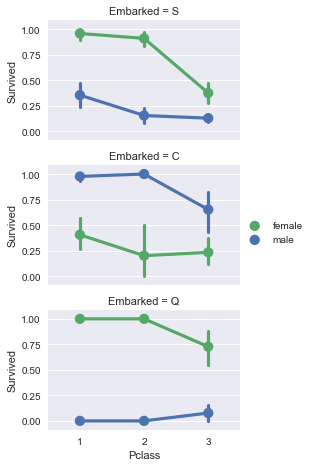

In [8]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

**Observations.**
<ul>
<li>Female passengers had much better survival rate than males. Confirms classifying (#1).</li>
<li>Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.</li>
<li>Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports. Completing (#2).</li>
<li>Ports of embarkation have varying survival rates for Pclass=3 and among male passengers. Correlating (#1).</li>
</ul>
**Decisions.**
<ul>
<li>Add Sex feature to model training.</li>
<li>Complete and add Embarked feature to model training.</li>
</ul>

### Wrangle data

We have collected several assumptions and decisions regarding our datasets and solution requirements. So far we did not have to change a single feature or value to arrive at these. Let us now execute our decisions and assumptions for correcting, creating, and completing goals.

In [9]:
# Cabin
type(train_df.loc[1, 'Cabin'])

train_df['Has_Cabin'] = train_df['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)
train_df[['Has_Cabin', 'Survived']].groupby('Has_Cabin', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_Cabin,Survived
1,1,0.666667
0,0,0.299854


** Decisions.**
<ul>
<li>Include Has_Cabin as a new feature</li>
</ul>

In [10]:
test_df['Has_Cabin'] = test_df['Cabin'].apply(lambda x : 0 if pd.isnull(x) else 1)

In [11]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 13), (418, 12), (891, 13), (418, 12))


('After', (891, 12), (418, 11), (891, 12), (418, 11))

In [12]:
#Ticket
type(train_df.loc[0, 'Ticket'])

def extract(ticket) :
    if ticket is None:
        return 0,0
    l = ticket.split(' ')
    has_slash = l[0].find('/')
    length = 0
    if (len(l) > 0) :
        try:
            length = len(l[1])
        except IndexError:
            length = 0
    return has_slash, length

extract('STON/O2. 3101282') 

(4, 7)

In [13]:
train_df['Has_slash'] = train_df['Ticket'].apply(lambda x : extract(x)[0])
train_df['Ticket_len'] = train_df['Ticket'].apply(lambda x : extract(x)[1])
train_df[['Has_slash', 'Survived']].groupby('Has_slash', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Has_slash,Survived
0,-1,0.399748
4,4,0.384615
2,2,0.370370
5,5,0.117647
1,1,0.111111
3,3,0.000000


In [14]:
train_df[['Ticket_len', 'Survived']].groupby('Ticket_len', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Ticket_len,Survived
5,5,0.508621
3,3,0.500000
2,2,0.416667
0,0,0.383459
6,6,0.250000
4,4,0.235294
7,7,0.187500
1,1,0.000000


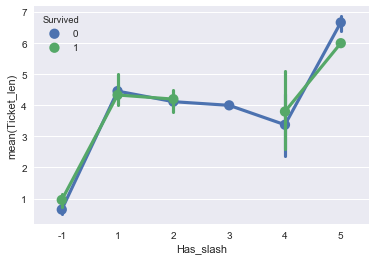

In [15]:
g = sns.pointplot(x="Has_slash", y="Ticket_len", hue = 'Survived', data=train_df)

** Decisions.**
<ul>
<li>Include Has_slash and Ticket_len as features.</li>
</ul>

In [16]:
test_df['Has_slash'] = test_df['Ticket'].apply(lambda x : extract(x)[0])
test_df['Ticket_len'] = test_df['Ticket'].apply(lambda x : extract(x)[1])

print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

('Before', (891, 14), (418, 13), (891, 14), (418, 13))


('After', (891, 13), (418, 12), (891, 13), (418, 12))

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [19]:
# Convert Titles by OneHotEncode

# We can convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

    
#train_df = pd.get_dummies(train_df, columns = ['Title'])
#test_df = pd.get_dummies(test_df, columns = ['Title'])
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,-1,5,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,4,7,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,-1,0,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,-1,0,1


In [20]:
for data in combine:
    data['Name_len'] = data['Name'].apply(lambda x : len(re.split('[^a-zA-Z]', x)))

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 13), (418, 12))

### Converting a categorical feature

Now we can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal.
Let us start by converting Sex feature to a new feature called Gender where female=1 and male=0.

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len
0,0,3,0,22.0,1,0,7.2500,S,0,1,5,1,6
1,1,1,1,38.0,1,0,71.2833,C,1,-1,5,3,11
2,1,3,1,26.0,0,0,7.9250,S,0,4,7,2,5
3,1,1,1,35.0,1,0,53.1000,S,1,-1,0,3,11
4,0,3,0,35.0,0,0,8.0500,S,0,-1,0,1,6


### Converting categorical feature to numeric

We can now convert the EmbarkedFill feature by creating a new numeric Port feature.

In [23]:
# Embarked

# only in train_df, fill the two missing values with the most occurred value, which is "S".
train_df["Embarked"] = train_df["Embarked"].fillna("S")

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len
0,0,3,0,22.0,1,0,7.2500,0,0,1,5,1,6
1,1,1,1,38.0,1,0,71.2833,1,1,-1,5,3,11
2,1,3,1,26.0,0,0,7.9250,0,0,4,7,2,5
3,1,1,1,35.0,1,0,53.1000,0,1,-1,0,3,11
4,0,3,0,35.0,0,0,8.0500,0,0,-1,0,1,6


In [24]:
#train_df = pd.get_dummies(train_df, columns = ['Embarked'])
#test_df = pd.get_dummies(test_df, columns = ['Embarked'])
#train_df.head()

### Completing a numerical continuous feature

Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

We can consider three methods to complete a numerical continuous feature.
<ol>
<li> A simple way is to generate random numbers between mean and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation).</li>

<li> More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using [median](https://en.wikipedia.org/wiki/Median) values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...</li>

<li> Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard deviation, based on sets of Pclass and Gender combinations.</li>
</ol>
Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer method 2.

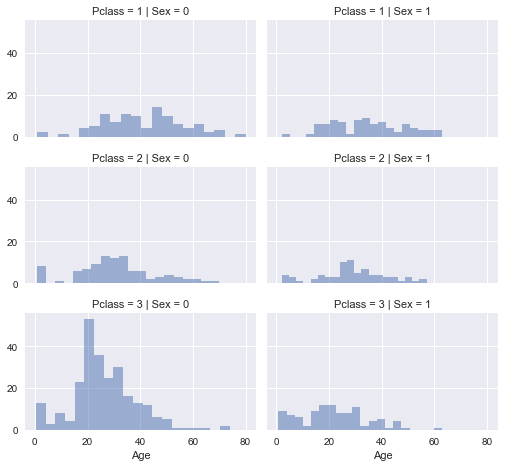

In [25]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
In [24]:


In [26]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [27]:
for dataset in combine :
    for i in range(0, 2) :
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j + 1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            age_guess = guess_df.median()
            
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j + 1), 'Age'] \
            = guess_ages[i, j]
    dataset['Age'] = dataset['Age'].astype(int)

    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6


In [28]:
train_df['Categorical_Age'] = 0
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,0
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,0
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,0
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,0
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,0


In [29]:
for i in range(2): 
    for j in range(3):
        train_df.loc[(train_df['Sex'] == i) &(train_df['Pclass'] == j + 1),'Categorical_Age'] = guess_ages[i, j]
        test_df.loc[(train_df['Sex'] == i) &(test_df['Pclass'] == j + 1),'Categorical_Age'] = guess_ages[i, j]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,24.0
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,41.0
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,22.0
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,41.0
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,24.0


In [30]:
for dataset in combine:
    dataset['Categorical_Age'] = dataset['Categorical_Age'].astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,22,1,0,7.2500,0,0,1,5,1,6,24
1,1,1,1,38,1,0,71.2833,1,1,-1,5,3,11,41
2,1,3,1,26,0,0,7.9250,0,0,4,7,2,5,22
3,1,1,1,35,1,0,53.1000,0,1,-1,0,3,11,41
4,0,3,0,35,0,0,8.0500,0,0,-1,0,1,6,24


Let us create Age bands and determine correlations with Survived.

In [31]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'],\
                                          as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


Let us replace Age with ordinals based on these bands.

In [32]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 4, 'Age'] = 1
    dataset.loc[(dataset['Age'] > 4) & (dataset['Age'] <= 8), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 8) & (dataset['Age'] <= 12), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 16), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 20), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 24), 'Age'] = 6
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 7
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 8
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 36), 'Age'] = 9
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 40), 'Age'] = 10
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 48), 'Age'] = 11
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 56), 'Age'] = 12
    dataset.loc[(dataset['Age'] > 56) & (dataset['Age'] <= 64), 'Age'] = 13
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 14
    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,AgeBand
0,0,3,0,6,1,0,7.2500,0,0,1,5,1,6,24,"(16.0, 32.0]"
1,1,1,1,10,1,0,71.2833,1,1,-1,5,3,11,41,"(32.0, 48.0]"
2,1,3,1,7,0,0,7.9250,0,0,4,7,2,5,22,"(16.0, 32.0]"
3,1,1,1,9,1,0,53.1000,0,1,-1,0,3,11,41,"(32.0, 48.0]"
4,0,3,0,9,0,0,8.0500,0,0,-1,0,1,6,24,"(32.0, 48.0]"


In [33]:
train_df = train_df.drop(['AgeBand'], axis = 1)
train_df.shape, test_df.shape

((891, 14), (418, 13))

In [34]:
train_df['Categorical_Age'].unique()

array([24, 41, 22, 42, 28])

In [35]:
age_dict={24: 6, 41: 11, 22: 6, 42: 11, 28: 7}
for data in combine:
    data.Categorical_Age=data.Categorical_Age.map(age_dict)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age
0,0,3,0,6,1,0,7.2500,0,0,1,5,1,6,24
1,1,1,1,10,1,0,71.2833,1,1,-1,5,3,11,41
2,1,3,1,7,0,0,7.9250,0,0,4,7,2,5,22
3,1,1,1,9,1,0,53.1000,0,1,-1,0,3,11,41
4,0,3,0,9,0,0,8.0500,0,0,-1,0,1,6,24


In [36]:
combine = [train_df, test_df]

### Create new feature combining existing features

We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.

In [37]:
for dataset in combine :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


We can create another feature called IsAlone.

In [38]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Let us drop Parch, SibSp.

In [39]:
train_df = train_df.drop(['Parch', 'SibSp'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,FamilySize,IsAlone
0,0,3,0,6,7.2500,0,0,1,5,1,6,24,2,0
1,1,1,1,10,71.2833,1,1,-1,5,3,11,41,2,0
2,1,3,1,7,7.9250,0,0,4,7,2,5,22,1,1
3,1,1,1,9,53.1000,0,1,-1,0,3,11,41,2,0
4,0,3,0,9,8.0500,0,0,-1,0,1,6,24,1,1


In [40]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,18,6,3
1,10,10,1
2,21,7,3
3,9,9,1
4,27,9,3
5,21,7,3
6,12,12,1
7,3,1,3
8,21,7,3
9,8,4,2


### Quick completing and converting a numeric feature

We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature. We do this in a single line of code.

Note that we are not creating an intermediate new feature or doing any further analysis for correlation to guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for model algorithm to operate on non-null values.

We may also want round off the fare to two decimals as it represents currency.

In [41]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,FamilySize,IsAlone,Age*Class
0,3,0,9,7.8292,2,0,-1,0,1,5,6,1,1,27
1,3,1,11,7.0000,0,0,-1,0,3,9,6,2,0,33
2,2,0,13,9.6875,2,0,-1,0,1,6,6,1,1,26
3,3,0,7,8.6625,0,0,-1,0,1,5,6,1,1,21
4,3,1,6,12.2875,0,0,-1,0,3,10,6,3,0,18


We now create FareBand.

In [42]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'],\
                                           as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Convert the Fare feature to ordinal values based on the FareBand.

In [43]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Cabin,Has_slash,Ticket_len,Title,Name_len,Categorical_Age,FamilySize,IsAlone,Age*Class
0,0,3,0,6,0,0,0,1,5,1,6,24,2,0,18
1,1,1,1,10,3,1,1,-1,5,3,11,41,2,0,10
2,1,3,1,7,1,0,0,4,7,2,5,22,1,1,21
3,1,1,1,9,3,0,1,-1,0,3,11,41,2,0,9
4,0,3,0,9,1,0,0,-1,0,1,6,24,1,1,27


### OneHotEncode

Since the features Pclass, Embarked and Title really are not ordinal, we need to use one hot encode to change them to categorical features. However, there is some problem with one hot encode (or get dummies), we can only do it in the end. Othewise it will cause some of the codes not executing. 

In [44]:
# preprocessing change categorical to onehotencode
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
columnsToEncode = ['Pclass', 'Embarked', 'Title']
enc.fit(train_df[columnsToEncode])

train_df = pd.concat([train_df.drop(columnsToEncode, axis = 1),
          pd.DataFrame(enc.transform(train_df[columnsToEncode]).toarray())], axis=1).reindex()
train_df.head()

,Survived,Sex,Age,Fare,Has_Cabin,Has_slash,Ticket_len,Name_len,Categorical_Age,FamilySize,...,1,2,3,4,5,6,7,8,9,10
0,0,0,6,0,0,1,5,6,24,2,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,1,10,3,1,-1,5,11,41,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,1,7,1,0,4,7,5,22,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,9,3,1,-1,0,11,41,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0,9,1,0,-1,0,6,24,1,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


The one single improvement is actually caused by this one hot encode. See below for comments. 

In [45]:
test_df = pd.concat([test_df.drop(columnsToEncode, axis = 1),
          pd.DataFrame(enc.transform(test_df[columnsToEncode]).toarray())], axis=1).reindex()
test_df.head()

,Sex,Age,Fare,Has_Cabin,Has_slash,Ticket_len,Name_len,Categorical_Age,FamilySize,IsAlone,...,1,2,3,4,5,6,7,8,9,10
0,0,9,0,0,-1,0,5,6,1,1,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,11,0,0,-1,0,9,6,2,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,13,1,0,-1,0,6,6,1,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,7,1,0,-1,0,5,6,1,1,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,6,1,0,-1,0,10,6,3,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model, predict and solve

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

linear method

- Logistic Regression
- Linear Support Vector Machine
- AdaBoost

Tree models
- Support Vector Machines

- XGBoost
- GradientBoosting
- Extra Trees Boosting

### Single model comparison

We first try to make the prediction using a single mode. 

In [46]:
X = train_df.drop('Survived', axis = 1)
y = train_df['Survived']
SEED = 43 # for replication. 

In [47]:
col=list(X.columns.values)
col.remove('Age*Class')
col

['Sex',
 'Age',
 'Fare',
 'Has_Cabin',
 'Has_slash',
 'Ticket_len',
 'Name_len',
 'Categorical_Age',
 'FamilySize',
 'IsAlone',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10]

In [48]:
X_l = X[col]
X_test_l=test_df[col]

In [49]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier as MLP
import xgboost as xgb

# score
from sklearn.metrics import accuracy_score

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Bayesian optimization for tuning parameters

We use Bayesian optimization to tune the parameters for each of the models. 

In [50]:
from __future__ import print_function
from __future__ import division

from sklearn.datasets import make_classification
from sklearn.cross_validation import cross_val_score
from bayes_opt import BayesianOptimization

In [51]:
# Set functions of the parameters
def logcv(C): 
    val = cross_val_score(
        LogisticRegression(C = C, random_state=SEED),
        X_l, y, 'accuracy', cv = 10
    ).mean()
    
    return val

def svccv(C, gamma):
    val = cross_val_score(
        SVC(C=C, gamma=gamma, random_state=SEED),
        X, y, 'accuracy', cv=10
    ).mean()

    return val

def lsvccv(C):
    val = cross_val_score(
        LinearSVC(C=C, random_state=SEED),
        X_l, y, 'accuracy', cv=10
    ).mean()

    return val

def adacv(n_estimators, learning_rate): 
    val = cross_val_score(
        AdaBoostClassifier(n_estimators=int(n_estimators),
                           learning_rate=learning_rate,
                           random_state=SEED),
        X_l, y, 'accuracy', cv = 10
    ).mean()
    
    return val

def etcv(n_estimators, max_depth, min_samples_leaf): 
    val = cross_val_score(
        ExtraTreesClassifier(n_estimators=int(n_estimators),
                             max_depth=int(max_depth),
                             min_samples_leaf=int(min_samples_leaf),
                             random_state=SEED),
        X, y, 'accuracy', cv = 10
    ).mean()
    
    return val

def gbcv(n_estimators, max_depth, min_samples_leaf) :
    val = cross_val_score(
        GradientBoostingClassifier(n_estimators = int(n_estimators),
                                   max_depth=int(max_depth),
                                   min_samples_leaf=int(min_samples_leaf),
                                   random_state=SEED),
        X, y, 'accuracy', cv = 10
    ).mean()
    
    return val

'''
def rfccv(n_estimators, min_samples_split, max_features):
    val = cross_val_score(
        RandomForestClassifier(n_estimators=int(n_estimators),
            min_samples_split=int(min_samples_split),
            max_features=min(max_features, 0.999),
            random_state=SEED
        ),
        X_train, y_train, 'accuracy', cv=3
    ).mean()
    return val
'''

def xgbcv(n_estimators, min_child_weight, max_depth):
    val = cross_val_score(
        xgb.XGBClassifier(n_estimators=int(n_estimators),
                          min_child_weight=int(min_child_weight),
                          max_depth=int(max_depth), 
                          gamma=0.59,
                          subsample= 0.8,
                          objective='binary:logistic',
                          nthread= -1,
                          scale_pos_weight=1
                         ),
        X, y, 'accuracy', cv=10
    ).mean()
    return val

In [52]:
gp_params = {"alpha": 1e-5}

logBO = BayesianOptimization(logcv,{'C': (0.001, 10)})
logBO.explore({'C': [0.001, 0.01, 0.1, 0.51, 0.7]})
logBO.maximize(n_iter=10, **gp_params)
print('-' * 53)
print('Final Results')
print('LOG: {}'.format(logBO.res['max']['max_params']))

Initialization
-----------------------------------------
 Step |   Time |      Value |         C | 
    1 | 00m00s |    0.70946 |    0.0010 | 
    2 | 00m00s |    0.80591 |    0.0100 | 
    3 | 00m00s |    0.82609 |    0.1000 | 
    4 | 00m00s |    0.83282 |    0.5100 | 
    5 | 00m00s |    0.83394 |    0.7000 | 
    6 | 00m00s |    0.83393 |    4.2264 | 
    7 | 00m00s |    0.83282 |    0.3451 | 
    8 | 00m00s |    0.83618 |    8.3693 | 
    9 | 00m00s |    0.83618 |    9.5314 | 
   10 | 00m00s |    0.83505 |    2.7209 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         C | 
   11 | 00m02s |    0.83618 |    9.2091 | 
   12 | 00m01s |    0.83618 |    8.7535 | 
   13 | 00m01s |    0.83505 |    3.0691 | 
   14 | 00m01s |    0.83393 |    3.8450 | 
   15 | 00m01s |    0.83505 |    3.4586 | 
   16 | 00m01s |    0.83393 |    4.6390 | 
   17 | 00m01s |    0.83393 |    5.0593 | 
   18 | 00m01s |    0.83393 |    5.4893 | 
   19 | 00m01s |   

In [53]:
adaBO = BayesianOptimization(
    adacv,
    {'n_estimators': (10, 500),
    'learning_rate': (0.1, 1)}
)

adaBO.maximize(n_iter=10, **gp_params)
print('-' * 53)

print('Final Results')
print('ADA: {}'.format(adaBO.res['max']['max_params']))

Initialization
----------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   n_estimators | 
    1 | 00m02s |    0.82264 |          0.4691 |       107.1430 | 
    2 | 00m08s |    0.82045 |          0.8262 |       282.4236 | 
    3 | 00m13s |    0.82154 |          0.4972 |       442.0564 | 
    4 | 00m11s |    0.82264 |          0.1637 |       497.0009 | 
    5 | 00m06s |    0.82375 |          0.3153 |       259.7947 | 
Bayesian Optimization
----------------------------------------------------------------
 Step |   Time |      Value |   learning_rate |   n_estimators | 
    6 | 00m10s |    0.82384 |          0.9101 |        10.0005 | 
    7 | 00m05s |    0.80691 |          0.2983 |        10.0083 | 
    8 | 00m20s |    0.82267 |          0.3219 |       500.0000 | 
    9 | 00m18s |    0.82045 |          0.6357 |       499.9886 | 
   10 | 00m17s |    0.81932 |          0.7259 |       499.9986 | 
   11 | 00m17s |    0.82379 |          0.

In [54]:
svcBO = BayesianOptimization(svccv,{'C': (0.001, 50), 'gamma': (0.0001, 1)})
svcBO.explore({'C': [0.001, 0.01, 0.1, 1], 'gamma': [0.001, 0.01, 0.1, 1]})
svcBO.maximize(n_iter=10, init_points=20, **gp_params)
print('-' * 53)

print('Final Results')
print('SVC: {}'.format(svcBO.res['max']['max_params']))

Initialization
-----------------------------------------------------
 Step |   Time |      Value |         C |     gamma | 
    1 | 00m00s |    0.61617 |    0.0010 |    0.0010 | 
    2 | 00m00s |    0.61617 |    0.0100 |    0.0100 | 
    3 | 00m00s |    0.67465 |    0.1000 |    0.1000 | 
    4 | 00m00s |    0.70254 |    1.0000 |    1.0000 | 
    5 | 00m00s |    0.75650 |    3.2000 |    0.4847 | 
    6 | 00m00s |    0.72172 |   38.2825 |    0.8710 | 
    7 | 00m00s |    0.76669 |   35.7330 |    0.3243 | 
    8 | 00m00s |    0.80700 |   23.0609 |    0.0200 | 
    9 | 00m00s |    0.72396 |   32.5834 |    0.8324 | 
   10 | 00m00s |    0.73072 |   46.6824 |    0.7694 | 
   11 | 00m00s |    0.76669 |   32.4675 |    0.3223 | 
   12 | 00m00s |    0.72059 |   37.4360 |    0.9142 | 
   13 | 00m00s |    0.73183 |   42.8075 |    0.6923 | 
   14 | 00m00s |    0.77900 |   19.1291 |    0.1884 | 
   15 | 00m00s |    0.75204 |   49.0925 |    0.4060 | 
   16 | 00m00s |    0.71721 |   22.0683 |    0.9559

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.03999695e-05]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)


   30 | 00m04s |    0.82159 |   44.8522 |    0.0001 | 
   31 | 00m04s |    0.76907 |    8.3217 |    0.0001 | 
   32 | 00m04s |    0.71609 |   50.0000 |    1.0000 | 
   33 | 00m04s |    0.82158 |   41.2493 |    0.0001 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.06007284e-05]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


   34 | 00m04s |    0.81495 |   25.8803 |    0.0001 | 
-----------------------------------------------------
Final Results
SVC: {'C': 44.852169308559716, 'gamma': 0.0001}


In [55]:
etBO = BayesianOptimization(
    etcv,
    {'n_estimators': (10, 1000),
    'min_samples_leaf': (2, 25),
    'max_depth': (2, 10)}
)

etBO.maximize(n_iter=20,init_points=20, **gp_params)
print('-' * 53)

print('Final Results')
print('ET: {}'.format(etBO.res['max']['max_params']))

Initialization
---------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   min_samples_leaf |   n_estimators | 
    1 | 00m07s |    0.82159 |      7.2352 |             4.9409 |       310.9257 | 
    2 | 00m10s |    0.80922 |      8.8820 |            22.1567 |       444.3614 | 
    3 | 00m08s |    0.79566 |      3.8229 |            13.9431 |       380.9706 | 
    4 | 00m18s |    0.82271 |      6.7259 |             3.6519 |       798.4764 | 
    5 | 00m20s |    0.81148 |      6.7381 |            19.7995 |       915.4915 | 
    6 | 00m08s |    0.82610 |      7.2046 |             2.3285 |       364.8322 | 
    7 | 00m05s |    0.80809 |      4.2894 |            17.9678 |       234.6010 | 
    8 | 00m04s |    0.82721 |      8.3947 |             2.5085 |       192.7948 | 
    9 | 00m16s |    0.81372 |      5.9180 |            15.0340 |       728.4994 | 
   10 | 00m00s |    0.81937 |      4.0554 |            16.4874 |        1

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -9.59107056e-05]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)


   27 | 00m31s |    0.83282 |      9.9685 |             2.0456 |       973.4724 | 
   28 | 00m30s |    0.83171 |      9.9790 |             2.0550 |       925.4873 | 
   29 | 00m18s |    0.83282 |      9.8185 |             2.0845 |       458.9077 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.96393753e-05]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)


   30 | 00m26s |    0.83171 |      9.9299 |             2.1475 |       759.0800 | 
   31 | 00m20s |    0.83282 |      9.9434 |             2.1644 |       497.4662 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.71854170e-05]), 'nit': 3, 'funcalls': 46}
  " state: %s" % convergence_dict)


   32 | 00m32s |    0.83282 |      9.7957 |             2.3339 |       999.3569 | 
   33 | 00m28s |    0.83171 |      9.9056 |             2.4618 |       835.1091 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.33623317e-05]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.79119039e-05]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)


   34 | 00m29s |    0.83171 |      9.8488 |             2.0385 |       899.3571 | 
   35 | 00m32s |    0.83282 |      9.8486 |             2.2171 |       999.1494 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.76256018e-05]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)


   36 | 00m10s |    0.83282 |      9.8879 |             2.0180 |        45.3577 | 
   37 | 00m21s |    0.83282 |      9.8883 |             2.1184 |       494.0648 | 
   38 | 00m32s |    0.83282 |      9.9393 |             2.0399 |       962.6929 | 
   39 | 00m20s |    0.83282 |      9.9839 |             2.0661 |       462.9865 | 
   40 | 00m20s |    0.83282 |      9.8680 |             2.0013 |       471.2589 | 
-----------------------------------------------------
Final Results
ET: {'n_estimators': 998.32827455626216, 'max_depth': 9.2563388937662729, 'min_samples_leaf': 2.1634241699544763}


In [56]:
def etcv_1(n_estimators): 
    val = cross_val_score(
        ExtraTreesClassifier(n_estimators=int(n_estimators),
                             max_depth=9,
                             min_samples_leaf=2,
                             random_state=SEED),
        X, y, 'accuracy', cv = 10
    ).mean()
    
    return val

etBO = BayesianOptimization(
    etcv_1,
    {'n_estimators': (10, 100)}
)
etBO.explore({'n_estimators': [47, 48, 49, 50]})

etBO.maximize(n_iter=10, **gp_params)
print('-' * 53)

print('Final Results')
print('ET: {}'.format(etBO.res['max']['max_params']))

Initialization
----------------------------------------------
 Step |   Time |      Value |   n_estimators | 
    1 | 00m01s |    0.83281 |        47.0000 | 
    2 | 00m01s |    0.83168 |        48.0000 | 
    3 | 00m01s |    0.83056 |        49.0000 | 
    4 | 00m01s |    0.83281 |        50.0000 | 
    5 | 00m01s |    0.83279 |        76.7758 | 
    6 | 00m00s |    0.83061 |        15.0292 | 
    7 | 00m00s |    0.83056 |        35.2023 | 
    8 | 00m01s |    0.83279 |        77.6218 | 
    9 | 00m00s |    0.83281 |        36.5927 | 
Bayesian Optimization
----------------------------------------------
 Step |   Time |      Value |   n_estimators | 
   10 | 00m09s |    0.83057 |        99.9983 | 
   11 | 00m06s |    0.83057 |        99.9996 | 
   12 | 00m04s |    0.82724 |        10.0021 | 
   13 | 00m06s |    0.83057 |        99.9978 | 
   14 | 00m06s |    0.83057 |        99.9960 | 
   15 | 00m04s |    0.82724 |        10.0002 | 
   16 | 00m06s |    0.83057 |        99.9988 | 
   17

In [57]:
gbBO = BayesianOptimization(
    gbcv,
    {'n_estimators': (10, 1000),
    'min_samples_leaf': (2, 25),
    'max_depth': (2, 10)}
)

gbBO.maximize(init_points=40, n_iter=20, **gp_params)
print('-' * 53)

print('Final Results')
print('GB: {}'.format(gbBO.res['max']['max_params']))

Initialization
---------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   min_samples_leaf |   n_estimators | 
    1 | 00m08s |    0.80252 |      9.7948 |            13.1221 |       334.5722 | 
    2 | 00m22s |    0.80595 |      6.3967 |             3.3713 |       923.9040 | 
    3 | 00m31s |    0.80035 |      8.6328 |             2.4927 |       998.7875 | 
    4 | 00m06s |    0.81716 |      3.2735 |            23.1674 |       756.4585 | 
    5 | 00m19s |    0.80475 |      9.6974 |             4.5306 |       537.1524 | 
    6 | 00m03s |    0.82719 |      2.3148 |             3.2189 |       671.6752 | 
    7 | 00m13s |    0.80821 |      5.0278 |            20.2175 |       989.7055 | 
    8 | 00m01s |    0.82272 |      2.4327 |            22.0939 |       294.3014 | 
    9 | 00m01s |    0.83397 |      4.7123 |            11.3040 |        92.2843 | 
   10 | 00m17s |    0.80031 |      8.1513 |            16.9001 |       80

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.48089839e-05]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.56032373e-05]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.71738899e-05]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)


Bayesian Optimization
---------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   min_samples_leaf |   n_estimators | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  5.24356437e-05]), 'nit': 3, 'funcalls': 45}
  " state: %s" % convergence_dict)


   41 | 00m22s |    0.82383 |      2.1654 |            24.9426 |       608.2842 | 
   42 | 00m09s |    0.82610 |      2.3748 |             2.5523 |        11.0563 | 
   43 | 00m10s |    0.82158 |      2.1913 |             2.2669 |        58.6725 | 
   44 | 00m10s |    0.82830 |      2.2017 |            24.8535 |       118.9484 | 
   45 | 00m10s |    0.81710 |      9.7898 |            24.7157 |        11.0807 | 
   46 | 00m11s |    0.82609 |      2.2674 |            24.6683 |       360.2191 | 
   47 | 00m10s |    0.82608 |      2.1738 |             2.1107 |       108.1442 | 
   48 | 00m11s |    0.82719 |      2.0240 |            24.2440 |       160.3517 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.10235303e-05]), 'nit': 4, 'funcalls': 47}
  " state: %s" % convergence_dict)


   49 | 00m13s |    0.82717 |      2.0157 |            24.1910 |       642.8943 | 
   50 | 00m14s |    0.82494 |      2.0190 |            24.9856 |       556.4920 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.50566700e-05]), 'nit': 4, 'funcalls': 47}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.31490179e-05]), 'nit': 3, 'funcalls': 53}
  " state: %s" % convergence_dict)


   51 | 00m15s |    0.82154 |      2.0484 |             2.1222 |       778.0113 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.80590102e-05]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)


   52 | 00m12s |    0.82831 |      2.0975 |            24.9222 |       388.4380 | 
   53 | 00m11s |    0.82493 |      2.0555 |            24.6394 |        95.6181 | 
   54 | 00m14s |    0.82941 |      2.0658 |             4.2649 |       643.1036 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.0001708]), 'nit': 2, 'funcalls': 47}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.47738387e-05]), 'nit': 5, 'funcalls': 56}
  " state: %s" % convergence_dict)


   55 | 00m13s |    0.81263 |      9.9693 |             2.0613 |        29.8568 | 
   56 | 00m11s |    0.82719 |      2.1581 |            24.7683 |        34.4284 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.53773066e-05]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)


   57 | 00m13s |    0.82497 |      2.0378 |            24.6888 |       344.8252 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.96123269e-05]), 'nit': 5, 'funcalls': 48}
  " state: %s" % convergence_dict)


   58 | 00m16s |    0.82378 |      2.0143 |             2.1751 |       840.5912 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  9.00352316e-05]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)


   59 | 00m12s |    0.82609 |      2.0707 |             2.1294 |       160.1401 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00022742]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)


   60 | 00m14s |    0.82940 |      2.0424 |             2.6236 |       628.0199 | 
-----------------------------------------------------
Final Results
GB: {'n_estimators': 92.28432645709546, 'max_depth': 4.7123474420256422, 'min_samples_leaf': 11.303988290126789}


In [98]:
def gbcv_1(n_estimators) :
    val = cross_val_score(
        GradientBoostingClassifier(n_estimators = int(n_estimators),
                                   max_depth=4,
                                   min_samples_leaf=11,
                                   random_state=SEED),
        X, y, 'accuracy', cv = 10
    ).mean()
    
    return val

gbBO = BayesianOptimization(
    gbcv_1,
    {'n_estimators': (5, 300)}
)
gbBO.explore({'n_estimators' : [123, 150]})

gbBO.maximize(n_iter=5, **gp_params)
print('-' * 53)

print('Final Results')
print('GB: {}'.format(gbBO.res['max']['max_params']))

Initialization
----------------------------------------------
 Step |   Time |      Value |   n_estimators | 
    1 | 00m01s |    0.83169 |       123.0000 | 
    2 | 00m02s |    0.83392 |       150.0000 | 
    3 | 00m01s |    0.83616 |       105.2060 | 
    4 | 00m01s |    0.83508 |        83.5734 | 
    5 | 00m02s |    0.82717 |       187.8241 | 
    6 | 00m02s |    0.82830 |       220.8320 | 
    7 | 00m00s |    0.83394 |        67.6362 | 
Bayesian Optimization
----------------------------------------------
 Step |   Time |      Value |   n_estimators | 
    8 | 00m09s |    0.80141 |         5.0050 | 
    9 | 00m07s |    0.81598 |       299.9899 | 
   10 | 00m06s |    0.83171 |        99.4099 | 
   11 | 00m07s |    0.83619 |       113.4823 | 
   12 | 00m06s |    0.83055 |       130.8035 | 
-----------------------------------------------------
Final Results
GB: {'n_estimators': 113.48233195940503}


In [59]:
xgbBO = BayesianOptimization(xgbcv, {'n_estimators':(20, 300), 'min_child_weight': (1, 20),'max_depth': (5, 15)})
num_iter = 20
init_points = 50
xgbBO.maximize(init_points=init_points, n_iter=num_iter, **gp_params)
print('-' * 53)

print('Final Results')
print('XGB: {}'.format(xgbBO.res['max']['max_params']))

Initialization
---------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   min_child_weight |   n_estimators | 
    1 | 00m02s |    0.82158 |     11.5210 |             5.0000 |       219.0481 | 
    2 | 00m01s |    0.82945 |      7.4379 |             8.2599 |       163.1123 | 
    3 | 00m00s |    0.82722 |     10.3550 |             2.2187 |        29.2980 | 
    4 | 00m01s |    0.82163 |      7.8681 |             7.7110 |       145.7058 | 
    5 | 00m01s |    0.82497 |     10.1150 |             2.0802 |       124.1113 | 
    6 | 00m01s |    0.83167 |     10.6885 |             4.3077 |       109.2924 | 
    7 | 00m02s |    0.82045 |      9.3300 |             4.8365 |       262.4854 | 
    8 | 00m01s |    0.81716 |     10.3275 |            13.1035 |       214.2285 | 
    9 | 00m01s |    0.81932 |      7.1856 |            11.1579 |       193.6405 | 
   10 | 00m02s |    0.81935 |      5.4026 |             2.9949 |       23

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00013652]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.81408393e-05]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.61129391e-05]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)


Bayesian Optimization
---------------------------------------------------------------------------------
 Step |   Time |      Value |   max_depth |   min_child_weight |   n_estimators | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.75742098e-05]), 'nit': 5, 'funcalls': 47}
  " state: %s" % convergence_dict)


   51 | 00m25s |    0.81825 |      5.4333 |            19.0650 |       299.9805 | 
   52 | 00m12s |    0.83393 |      5.0751 |             1.3825 |        91.8700 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.73280205e-05]), 'nit': 5, 'funcalls': 51}
  " state: %s" % convergence_dict)


   53 | 00m12s |    0.83281 |      5.0636 |             1.0692 |        89.4398 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  4.15528794e-05]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)


   54 | 00m14s |    0.81937 |      5.0427 |             1.3721 |       298.3375 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -9.58117380e-05]), 'nit': 4, 'funcalls': 49}
  " state: %s" % convergence_dict)


   55 | 00m12s |    0.83279 |      5.0107 |             1.1552 |        99.7651 | 
   56 | 00m12s |    0.82717 |      5.0715 |             1.2083 |        74.8037 | 
   57 | 00m14s |    0.82946 |     14.6602 |             1.0191 |        97.8551 | 
   58 | 00m13s |    0.83394 |      5.1052 |             1.1439 |       105.3977 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  9.86566083e-05]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.14369104e-05]), 'nit': 2, 'funcalls': 48}
  " state: %s" % convergence_dict)


   59 | 00m13s |    0.82609 |      5.2500 |             1.1319 |        45.4620 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  6.57059766e-05]), 'nit': 3, 'funcalls': 49}
  " state: %s" % convergence_dict)


   60 | 00m12s |    0.83508 |      5.0340 |             1.0557 |        90.4315 | 
   61 | 00m13s |    0.83279 |      5.1055 |             1.2519 |        97.5099 | 
   62 | 00m14s |    0.83166 |      5.0037 |             1.3073 |       100.4436 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.95588722e-05]), 'nit': 3, 'funcalls': 48}
  " state: %s" % convergence_dict)


   63 | 00m13s |    0.83281 |      5.1609 |             1.0153 |        92.7896 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.40019166e-05]), 'nit': 2, 'funcalls': 44}
  " state: %s" % convergence_dict)


   64 | 00m13s |    0.83056 |     14.5102 |             1.0760 |        90.3896 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  3.55321681e-05]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)


   65 | 00m13s |    0.83166 |      5.1400 |             1.0348 |       100.6280 | 
   66 | 00m13s |    0.83055 |      5.1798 |             1.0682 |       110.2505 | 
   67 | 00m13s |    0.83168 |      5.0140 |             1.1418 |        85.5043 | 
   68 | 00m13s |    0.83281 |      5.0105 |             1.1060 |        88.5875 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -7.17166768e-05]), 'nit': 4, 'funcalls': 46}
  " state: %s" % convergence_dict)
/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.28171484e-05]), 'nit': 4, 'funcalls': 50}
  " state: %s" % convergence_dict)


   69 | 00m14s |    0.83279 |      5.0989 |             1.1711 |       102.8581 | 
   70 | 00m14s |    0.82946 |     14.8732 |             1.0243 |        98.0175 | 
-----------------------------------------------------
Final Results
XGB: {'n_estimators': 90.431455550339692, 'max_depth': 5.0339653794356609, 'min_child_weight': 1.0556856956010958}


In [99]:
def xgbcv1(n_estimators):
    val = cross_val_score(
        xgb.XGBClassifier(n_estimators=int(n_estimators),
                          min_child_weight=1,
                          max_depth=5, 
                          gamma=0.59,
                          subsample= 0.8,
                          objective='binary:logistic',
                          nthread= -1,
                          scale_pos_weight=1
                         ),
        X, y, 'accuracy', cv=10
    ).mean()
    return val

xgbBO = BayesianOptimization(xgbcv1, {'n_estimators':(20, 300)})
num_iter = 5
init_points = 15
xgbBO.maximize(init_points=init_points, n_iter=num_iter, **gp_params)
print('-' * 53)

print('Final Results')
print('XGB: {}'.format(xgbBO.res['max']['max_params']))

Initialization
----------------------------------------------
 Step |   Time |      Value |   n_estimators | 
    1 | 00m02s |    0.82162 |       249.0230 | 
    2 | 00m02s |    0.81940 |       220.8991 | 
    3 | 00m01s |    0.82608 |       162.8116 | 
    4 | 00m01s |    0.82162 |       189.2566 | 
    5 | 00m01s |    0.81937 |       190.8451 | 
    6 | 00m00s |    0.82943 |        81.0006 | 
    7 | 00m00s |    0.83279 |        98.8482 | 
    8 | 00m00s |    0.83057 |        79.6664 | 
    9 | 00m00s |    0.83394 |        94.6580 | 
   10 | 00m02s |    0.82162 |       246.3577 | 
   11 | 00m02s |    0.82162 |       239.0361 | 
   12 | 00m01s |    0.82162 |       188.6195 | 
   13 | 00m00s |    0.82945 |        76.6445 | 
   14 | 00m01s |    0.82941 |       145.8979 | 
   15 | 00m00s |    0.82943 |        53.2766 | 
Bayesian Optimization
----------------------------------------------
 Step |   Time |      Value |   n_estimators | 
   16 | 00m10s |    0.82720 |        20.0031 | 


/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/sklearn/gaussian_process/gpr.py:457: UserWarning:

fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.01749037e-05]), 'nit': 6, 'funcalls': 54}



   17 | 00m06s |    0.82720 |        20.0031 | 
   18 | 00m07s |    0.83279 |        99.3508 | 
   19 | 00m08s |    0.81824 |       299.9965 | 
   20 | 00m06s |    0.83394 |        96.1250 | 
-----------------------------------------------------
Final Results
XGB: {'n_estimators': 94.658046805397589}


In [100]:
# Put in our parameters for said classifiers
# Logistic Regression
log_params = {'C' : 0.92, 'random_state' : SEED}

# Support Vector Machines parameters
svc_params = {'C' : 31.5,
              'gamma' : 0.0001,
              'kernel' : 'rbf',
              'random_state' : SEED
             }

# KNN parameters
knn_params = {'n_neighbors' : 7}

# Random Forest parameters
rf_params = {'max_features' : 0.79,
             'n_estimators': 155,
             'min_samples_leaf': 24, 
             'random_state' : SEED
            }

# Linear SVC parameters
lsvc_params = {'C': 0.1, 'random_state' : SEED}

# AdaBoost parameters
ada_params = {'n_estimators': 10, 
              'learning_rate' : 0.87,
              'random_state' : SEED}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':47,
    'max_depth': 9,
    'min_samples_leaf': 2,
    'verbose': 0,
    'random_state' : SEED
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 114,
    'max_depth': 4,
    'min_samples_leaf': 11,
    'verbose': 0,
    'random_state' : SEED
}

# XGB
xgb_params = {
    'n_estimators': 90,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0.59,                        
    'subsample': 0.8,
    'colsample_bytree':1,
    'objective': 'binary:logistic',
    'nthread': -1,
    'scale_pos_weight':1
}

In [101]:
gbm = xgb.XGBClassifier(**xgb_params)
gbm.fit(X, y)
xgb_pred = gbm.predict(test_df)

In [102]:
gb = GradientBoostingClassifier(**gb_params)
gb.fit(X, y)
gb_pred = gb.predict(test_df)

In [103]:
log = LogisticRegression(**log_params)
log.fit(X_l, y)
log_pred = log.predict(X_test_l)

In [104]:
et = ExtraTreesClassifier(**et_params)
et.fit(X, y)
et_pred = et.predict(test_df)

In [105]:
ada = AdaBoostClassifier(**ada_params)
ada.fit(X_l, y)
ada_pred = ada.predict(X_test_l)

In [106]:
svc = SVC(**svc_params)
svc.fit(X, y)
svc_pred=svc.predict(test_df)

In [107]:
df = pd.DataFrame({'log' : log_pred, 'ada' : ada_pred, 'xgb': xgb_pred, 'gb': gb_pred, 'et':et_pred})
df.head()

,ada,et,gb,log,xgb
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,1,1,1


In [108]:
df['value'] = df.sum(axis=1)
df.head()

,ada,et,gb,log,xgb,value
0,0,0,0,0,0,0
1,1,0,0,0,0,1
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,1,1,1,5


In [109]:
df['pred'] = df['value'].apply(lambda x : 1 if x > 0.5 * 5 else 0)
df.head()

,ada,et,gb,log,xgb,value,pred
0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,1,1,1,1,1,5,1


In [110]:
voteSubmission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": df['pred'].values
    })

In [111]:
voteSubmission.to_csv('voteSubmission.csv', index = False)

The vote submission has score 0.80861

In [112]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": gb_pred
    })

In [113]:
submission.to_csv('submssion.csv', index = False)

The score was 0.78468 after Bayesian optimization.

## Stacking

### Stacking using XGBoost

In [114]:
import re
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### Pearson Correlation Heatmap

let us generate some correlation plots of the features to see how related one feature is to the next. To do so, we will utilise the Seaborn plotting package which allows us to plot heatmaps very conveniently as follows

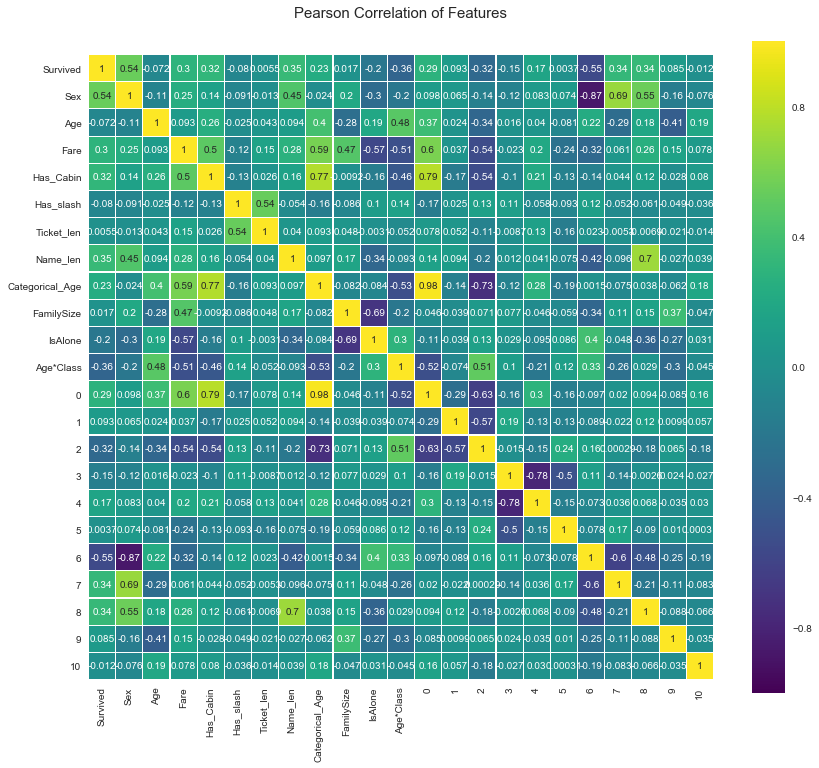

In [76]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

### Takeaway from the Plots

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Family size and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

### Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in divide

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning:

invalid value encountered in true_divide

/Users/zhuyuecheng/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



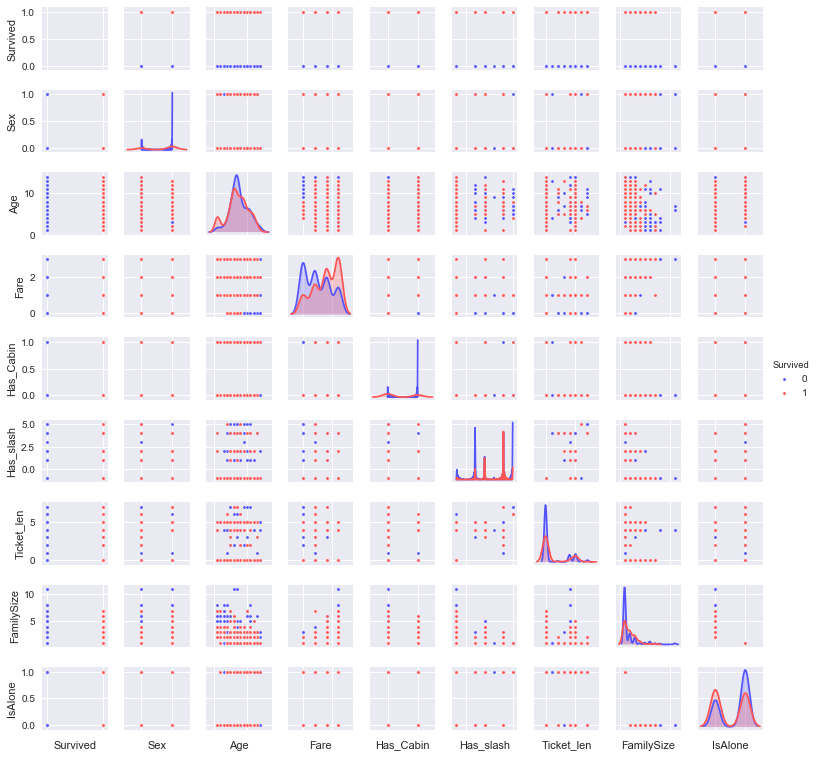

In [77]:
col = ['Survived', 'Sex', 'Age', 'Fare', 'Has_Cabin', 'Has_slash',\
       'Ticket_len', 'FamilySize', 'IsAlone']
g = sns.pairplot(train_df[col], hue='Survived', palette = 'seismic',\
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

The section of code below is from [Ref 2](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python). It is a class *SklearnHelper* that allows one to extend the inbuilt methods (such as train, predict and fit) common to all the Sklearn classifiers. Therefore this cuts out redundancy as  won't need to write the same methods five times if we wanted to invoke five different classifiers.

In [78]:
# Some useful parameters which will come in handy later on
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
NFOLDS = 10 # set folds for out-of-fold prediction


# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, params = {}):
        self.clf = clf(**params)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X):
        return self.clf.predict(X)

### Creating NumPy arrays out of our train and test sets

Great. Having prepared our first layer base models as such, we can now ready the training and test test data for input into our classifiers by generating NumPy arrays out of their original dataframes as follows:

In [79]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = train_df['Survived'].ravel()
X_train = X.values # Creates an array of the train data
X_l=X_l.values
X_test = test_df.values # Creats an array of the test data
X_test_l=X_test_l.values

In [80]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = NFOLDS, shuffle = True, random_state=3)
skf.get_n_splits(X_train, y_train)

10

### Out-of-Fold Predictions

Stacking uses predictions of base classifiers as input for training to a second-level model. However one cannot simply train the base models on the full training data, generate predictions on the full test set and then output these for the second-level training. This runs the risk of your base model predictions already having "seen" the test set and therefore overfitting when feeding these predictions.

In [81]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))
    
    # i is from 0 to NFOLDS
    for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Generating our Base First-Level Models 

So now let us use the above learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:
<ol>
 <li>Logistic Regression</li>
 <li>Extree Tree</li>
 <li>Gradient Boost</li>
 <li>AdaBoost</li>
 <li>RandomForest</li>
 <li>SVC</li>
</ol>

Create classifying objects

In [82]:
# Create 6 objects that represent our 6 models
svc = SklearnHelper(clf=SVC, params=svc_params)
#rf = SklearnHelper(clf=RandomForestClassifier, params=rf_params)
log = SklearnHelper(clf=LogisticRegression, params=log_params)
#per = SklearnHelper(clf=Perceptron, has_random_state = True)
#sgd = SklearnHelper(clf=SGDClassifier, has_random_state = True)
et = SklearnHelper(clf=ExtraTreesClassifier, params=et_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, params=gb_params)
#lsvc = SklearnHelper(clf=LinearSVC, params = lsvc_params)
#dt = SklearnHelper(clf=DecisionTreeClassifier, has_random_state = True)
ada = SklearnHelper(clf=AdaBoostClassifier, params=ada_params)
xgbc = SklearnHelper(clf=xgb.XGBClassifier, params=xgb_params)

### Output of the First level Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [83]:
# Create our OOF train and test predictions. These base results will be used as new features
svc_oof_train, svc_oof_test = get_oof(svc, X_train, y_train, X_test)
log_oof_train, log_oof_test = get_oof(log, X_l, y_train, X_test_l)
et_oof_train, et_oof_test = get_oof(et, X_train, y_train, X_test)
gb_oof_train, gb_oof_test = get_oof(gb, X_train, y_train, X_test)
ada_oof_train, ada_oof_test = get_oof(ada, X_l, y_train, X_test_l)
xgb_oof_train, xgb_oof_test = get_oof(xgbc, X_train, y_train, X_test)
print("Training is complete")

Training is complete


## Second-level predictions from the first-level output
### First-level output as new features

Having now obtained our first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [84]:
base_predictions_train = pd.DataFrame({
                                        #'RandomForest': rf_oof_train.ravel(),
                                        'SVC' : svc_oof_train.ravel(),
                                        #'KNN' : knn_oof_train.ravel(),
                                        'LogReg' : log_oof_train.ravel(),
                                        #'NaiveBayes' : nb_oof_train.ravel(),
                                        'ExtraTrees': et_oof_train.ravel(),
                                        'GradientBoost': gb_oof_train.ravel(),
                                        #'Perceptron' : per_oof_train.ravel(),
                                        #'SGD' : sgd_oof_train.ravel(),
                                        #'DecisionTree' : dt_oof_train.ravel(),
                                        'AdaBoost' : ada_oof_train.ravel(),
                                        #'LinearSVC' : lsvc_oof_train.ravel()
                                        'XGBoost' : xgb_oof_train.ravel()
})
                                       
base_predictions_train.head()

,AdaBoost,ExtraTrees,GradientBoost,LogReg,SVC,XGBoost
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0


**Correlation Heatmap of the Second Level Training set**

In [85]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

There have been quite a few articles and Kaggle competition winner stories about the merits of having trained models that are more uncorrelated with one another producing better scores.

In [86]:
x_train = np.concatenate(( xgb_oof_train,
                          #rf_oof_train,
                          #dt_oof_train, 
                          svc_oof_train, 
                          ada_oof_train,
                          log_oof_train,
                          gb_oof_train,
                          et_oof_train,
                          #lsvc_oof_train
                         ), axis=1)
                          
x_test = np.concatenate(( xgb_oof_test,
                         #rf_oof_test,
                         #dt_oof_test,
                         svc_oof_test,
                         ada_oof_test,
                         log_oof_test,
                         gb_oof_test,
                         et_oof_test,
                         #lsvc_oof_test
                        ), axis=1)

x_train.shape

(891, 6)

Having now concatenated and joined both the first-level train and test predictions as x_train and x_test, we can now fit a second-level learning model.

### Second level learning model via XGBoost

Here we choose the eXtremely famous library for boosted tree learning model, XGBoost. It was built to optimize large-scale boosted tree algorithms. For further information about the algorithm, check out the [official documentation][1].

  [1]: https://xgboost.readthedocs.io/en/latest/

Anyways, we call an XGBClassifier and fit it to the first-level train and target data and use the learned model to predict the test data as follows:

In [87]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 10,
 max_depth= 2,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1)
gbm.fit(x_train, y_train)
predictions = gbm.predict(x_test)

### Producing the Submission file again

In [88]:
# Generate Submission File 
xgb_stack_submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
xgb_stack_submission.to_csv("xgb_stack_submission.csv", index=False)

The new score is 0.78468 after stacking.

We can compare the two predictions

In [89]:
compare_df = pd.merge(submission, xgb_stack_submission, on = 'PassengerId')
compare_df.head()

,PassengerId,Survived_x,Survived_y
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,1,1


In [90]:
compare_df['Difference'] = compare_df['Survived_x'] != compare_df['Survived_y']
compare_df.head()

,PassengerId,Survived_x,Survived_y,Difference
0,892,0,0,False
1,893,0,0,False
2,894,0,0,False
3,895,0,0,False
4,896,1,1,False


In [91]:
count = len(compare_df[compare_df['Difference']])
ratio = count/float(418)
print(ratio)

0.0717703349282


In [92]:
rfc = RandomForestClassifier(max_depth=3,
                            random_state=0)
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

In [93]:
# Generate Submission File 
rfc_stack_submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
rfc_stack_submission.to_csv("rfc_stack_submission.csv", index=False)

The score was 0.79452.

In [94]:
lgr=LogisticRegression(random_state=3)
lgr.fit(x_train, y_train)
predictions = lgr.predict(x_test)

In [95]:
# Generate Submission File 
lgr_stack_submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
lgr_stack_submission.to_csv("lgr_stack_submission.csv", index=False)

The score was 0.79452.

In [96]:
mlp=MLP(hidden_layer_sizes=(2,), random_state =SEED)
mlp.fit(x_train, y_train)
predictions = mlp.predict(x_test)

In [97]:
# Generate Submission File 
mlp_stack_submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': predictions })
mlp_stack_submission.to_csv("mlp_stack_submission.csv", index=False)

The score was 0.77990.

## Conclusion

The best method so far is using stacking. It improves the score to 0.80861 by majority voting stacking. 

## References

This notebook has been created based on great work done solving the Titanic competition and other sources.

<ul>
  <li> 
  <a href = "https://www.kaggle.com/startupsci/titanic-data-science-solutions">Titanitc Data Science Solutions</a>
  </li>
  <li> 
  <a href = "https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python">Introduction to Ensembling/Stacking in Pyth 238427</a>
  </li>
  <li>
  <a href = "https://www.kaggle.com/sinakhorami/titanic-best-working-classifier">Titanic best working classifier</a>
  </li>
  <li>
  <a href = "https://www.kaggle.com/omarelgabry/a-journey-through-titanic">A Journey through Titanic</a>
  </li>
</ul>
